## 1. Using Python, consolidate the data from all the tables available in the file


#### In first step we have consolidate all the data that client have provided us in different table format . 

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

#### data of Table1

In [3]:
table1=pd.read_excel(r"C:\Users\DELL\Downloads\Data Researcher - Assessment.xlsx",sheet_name="Data",usecols=[0,1,2,3,4,5,6,7])

In [4]:
table1

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue
0,28/06/2018,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,01/07/2019,20000.0
1,16/11/2017,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,31/12/2019,10000.0
2,10/11/2017,Producer2,2-Client Presentation-Await Feedback,Prohire Plc,Review - 2019,Transportation,04/06/2019,10000.0
3,06/12/2017,Producer2,"1-Met Client,Data Gather,Insurer Market",G T Access Ltd,First Meeting - Review 2019,Other,30/11/2019,8000.0
4,29/04/2019,Producer2,2-Client Presentation-Await Feedback,Arh Group Ltd,Insurance Review,Commercial - All Other,28/06/2019,25000.0
...,...,...,...,...,...,...,...,...
90,10/04/2019,Producer3,3-Closed Won,"Ensco 1067 Limited, W J Holdings Limited, MCS ...",Payment Fraud Training,NaN,01/03/2019,495.0
91,06/06/2019,Producer3,3-Closed Won,Eurocell Building Plastics Ltd,CBCP,NaN,06/06/2019,11000.0
92,14/05/2019,Producer4,3-Closed Won,Property Services Plus,Property Service Plus - additonal risks,Real Estate,30/03/2019,636.2
93,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,=,NaN


#### Checking Duplicate values 

In [5]:
duplictes=table1.apply(lambda x:x.duplicated().sum())
print(duplictes)

Date                      49
Primary Producer          90
Stage Name                92
Account Name              18
Opportunity Name          30
Niche Affiliations        75
Expected Decision Date    39
Annual Revenue            49
dtype: int64


#### Removing Duplicate values

In [6]:
table1.drop_duplicates(inplace=True)

In [7]:
table1.duplicated().sum()

0

#### Handelling data types

In [8]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 94
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    94 non-null     object 
 1   Primary Producer        94 non-null     object 
 2   Stage Name              94 non-null     object 
 3   Account Name            94 non-null     object 
 4   Opportunity Name        94 non-null     object 
 5   Niche Affiliations      84 non-null     object 
 6   Expected Decision Date  94 non-null     object 
 7   Annual Revenue          92 non-null     float64
dtypes: float64(1), object(7)
memory usage: 6.6+ KB


#### Converting Data type of date object into datetime

In [9]:
table1["Date"]=pd.to_datetime(table1["Date"],format="%d/%m/%Y",errors="coerce")


In [10]:
table1["Expected Decision Date"]=pd.to_datetime(table1["Expected Decision Date"],format="%d/%m/%Y",errors="coerce")

In [11]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 94
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    91 non-null     datetime64[ns]
 1   Primary Producer        94 non-null     object        
 2   Stage Name              94 non-null     object        
 3   Account Name            94 non-null     object        
 4   Opportunity Name        94 non-null     object        
 5   Niche Affiliations      84 non-null     object        
 6   Expected Decision Date  92 non-null     datetime64[ns]
 7   Annual Revenue          92 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 6.6+ KB


#### Handelling missing values

In [12]:
table1

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue
0,2018-06-28,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,2019-07-01,20000.0
1,2017-11-16,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,2019-12-31,10000.0
2,2017-11-10,Producer2,2-Client Presentation-Await Feedback,Prohire Plc,Review - 2019,Transportation,2019-06-04,10000.0
3,2017-12-06,Producer2,"1-Met Client,Data Gather,Insurer Market",G T Access Ltd,First Meeting - Review 2019,Other,2019-11-30,8000.0
4,2019-04-29,Producer2,2-Client Presentation-Await Feedback,Arh Group Ltd,Insurance Review,Commercial - All Other,2019-06-28,25000.0
...,...,...,...,...,...,...,...,...
89,2019-04-15,Producer3,"1-Met Client,Data Gather,Insurer Market",Simons Group Ltd,IASME Consultancy,Commercial - All Other,2019-07-25,4980.0
91,2019-06-06,Producer3,3-Closed Won,Eurocell Building Plastics Ltd,CBCP,NaN,2019-06-06,11000.0
92,2019-05-14,Producer4,3-Closed Won,Property Services Plus,Property Service Plus - additonal risks,Real Estate,2019-03-30,636.2
93,2019-02-01,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,NaT,NaN


In [13]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 94
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    91 non-null     datetime64[ns]
 1   Primary Producer        94 non-null     object        
 2   Stage Name              94 non-null     object        
 3   Account Name            94 non-null     object        
 4   Opportunity Name        94 non-null     object        
 5   Niche Affiliations      84 non-null     object        
 6   Expected Decision Date  92 non-null     datetime64[ns]
 7   Annual Revenue          92 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 6.6+ KB


In [14]:
table1["Date"].fillna(method="ffill",inplace=True)

In [15]:
table1["Expected Decision Date"].fillna(method="ffill",inplace=True)

In [16]:
table1["Niche Affiliations"].fillna(table1["Niche Affiliations"].mode()[0],inplace=True)

In [17]:
table1["Annual Revenue"].fillna(table1["Annual Revenue"].mean(),inplace=True)

In [18]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 94
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    94 non-null     datetime64[ns]
 1   Primary Producer        94 non-null     object        
 2   Stage Name              94 non-null     object        
 3   Account Name            94 non-null     object        
 4   Opportunity Name        94 non-null     object        
 5   Niche Affiliations      94 non-null     object        
 6   Expected Decision Date  94 non-null     datetime64[ns]
 7   Annual Revenue          94 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 6.6+ KB


In [19]:
table1

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue
0,2018-06-28,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,2019-07-01,20000.00000
1,2017-11-16,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,2019-12-31,10000.00000
2,2017-11-10,Producer2,2-Client Presentation-Await Feedback,Prohire Plc,Review - 2019,Transportation,2019-06-04,10000.00000
3,2017-12-06,Producer2,"1-Met Client,Data Gather,Insurer Market",G T Access Ltd,First Meeting - Review 2019,Other,2019-11-30,8000.00000
4,2019-04-29,Producer2,2-Client Presentation-Await Feedback,Arh Group Ltd,Insurance Review,Commercial - All Other,2019-06-28,25000.00000
...,...,...,...,...,...,...,...,...
89,2019-04-15,Producer3,"1-Met Client,Data Gather,Insurer Market",Simons Group Ltd,IASME Consultancy,Commercial - All Other,2019-07-25,4980.00000
91,2019-06-06,Producer3,3-Closed Won,Eurocell Building Plastics Ltd,CBCP,Commercial - All Other,2019-06-06,11000.00000
92,2019-05-14,Producer4,3-Closed Won,Property Services Plus,Property Service Plus - additonal risks,Real Estate,2019-03-30,636.20000
93,2019-02-01,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,2019-03-30,7793.65663


#### Data of Table2

In [20]:
table2=pd.read_excel(r"C:\Users\DELL\Downloads\Data Researcher - Assessment.xlsx",sheet_name="Data",usecols=[14,15,16,17])

C:\Users\DELL\AppData\Local\Temp\ipykernel_788\3300806108.py:1: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  table2=pd.read_excel(r"C:\Users\DELL\Downloads\Data Researcher - Assessment.xlsx",sheet_name="Data",usecols=[14,15,16,17])


In [21]:
table2

,Account Name.1,Acct ID,Primary Office
0,West Point Construction Ltd,A101,Office 1
1,Newmor Group Limited,A102,Office 2
2,Prohire Plc,A103,Office 2
3,G T Access Ltd,A104,Office 2
4,Arh Group Ltd,A105,Office 2
...,...,...,...
90,NaN,NaN,NaN
91,NaN,NaN,NaN
92,NaN,NaN,NaN
93,NaN,NaN,NaN


In [22]:
table2=table2.rename(columns={"Account Name.1":"Account Name"})
table2

,Account Name,Acct ID,Primary Office
0,West Point Construction Ltd,A101,Office 1
1,Newmor Group Limited,A102,Office 2
2,Prohire Plc,A103,Office 2
3,G T Access Ltd,A104,Office 2
4,Arh Group Ltd,A105,Office 2
...,...,...,...
90,NaN,NaN,NaN
91,NaN,NaN,NaN
92,NaN,NaN,NaN
93,NaN,NaN,NaN


#### Here i can use "Acc Id" as a primary key to join two tables and also i can use "Account name" as a common key from both the table

In [23]:
merged_df=pd.merge(table1,table2, on="Account Name")
merged_df

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue,Acct ID,Primary Office
0,2018-06-28,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,2019-07-01,20000.00,A101,Office 1
1,2017-11-16,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,2019-12-31,10000.00,A102,Office 2
2,2017-11-10,Producer2,2-Client Presentation-Await Feedback,Prohire Plc,Review - 2019,Transportation,2019-06-04,10000.00,A103,Office 2
3,2017-12-06,Producer2,"1-Met Client,Data Gather,Insurer Market",G T Access Ltd,First Meeting - Review 2019,Other,2019-11-30,8000.00,A104,Office 2
4,2019-04-29,Producer2,2-Client Presentation-Await Feedback,Arh Group Ltd,Insurance Review,Commercial - All Other,2019-06-28,25000.00,A105,Office 2
...,...,...,...,...,...,...,...,...,...,...
89,2018-06-12,Producer5,"1-Met Client,Data Gather,Insurer Market",Brockhouse Group Ltd,Meeting 01/08/18,Manufacturing,2019-12-01,7500.00,A173,Office 2
90,2018-07-13,Producer5,"1-Met Client,Data Gather,Insurer Market",Vanguard Foundry Ltd,First Meeting 22/08/18,Manufacturing,2019-11-01,25000.00,A174,Office 2
91,2019-03-06,Producer5,"1-Met Client,Data Gather,Insurer Market",Salop Leisure Holdings Ltd.,First Meeting 04/06/19,Retail,2019-11-01,20000.00,A175,Office 2
92,2019-03-14,Producer5,"1-Met Client,Data Gather,Insurer Market",Lake Chemical & Minerals Ltd,Meeting 21/05/19,Commercial - All Other,2019-08-05,10000.00,A176,Office 2


In [24]:
table3=pd.read_excel(r"C:\Users\DELL\Downloads\Data Researcher - Assessment.xlsx",sheet_name="Data",usecols=[9,10])



In [25]:
table3

,Primary Producer.1,Office
0,Producer1,Office 1
1,Producer2,Office 2
2,Producer3,Office 3
3,Producer4,Office 1
4,Producer5,Office 2
...,...,...
90,NaN,NaN
91,NaN,NaN
92,NaN,NaN
93,NaN,NaN


In [26]:
table3=table3.rename(columns={"Primary Producer.1":"Primary Producer"})

In [45]:
final_merged_tables=pd.merge(merged_df,table3, on="Primary Producer")

In [46]:
final_merged_tables

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue,Acct ID,Primary Office,Office
0,2018-06-28,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,2019-07-01,20000.00,A101,Office 1,Office 1
1,2017-11-16,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,2019-12-31,10000.00,A102,Office 2,Office 2
2,2017-11-10,Producer2,2-Client Presentation-Await Feedback,Prohire Plc,Review - 2019,Transportation,2019-06-04,10000.00,A103,Office 2,Office 2
3,2017-12-06,Producer2,"1-Met Client,Data Gather,Insurer Market",G T Access Ltd,First Meeting - Review 2019,Other,2019-11-30,8000.00,A104,Office 2,Office 2
4,2019-04-29,Producer2,2-Client Presentation-Await Feedback,Arh Group Ltd,Insurance Review,Commercial - All Other,2019-06-28,25000.00,A105,Office 2,Office 2
...,...,...,...,...,...,...,...,...,...,...,...
89,2019-05-14,Producer4,3-Closed Won,Property Services Plus,Property Services Plus - renewal addition,Real Estate,2019-10-30,1034.44,A153,Office 1,Office 1
90,2019-05-14,Producer4,3-Closed Won,Property Services Plus,Property Service Plus - additonal risks,Real Estate,2019-03-30,636.20,A153,Office 1,Office 1
91,2019-05-14,Producer4,3-Closed Won,Alltrust SIPP Limited as Trustees of the Alltr...,Pension risk added - Wright Hassall lead,Financial Institutions; Real Estate,2019-03-11,869.84,A154,Office 1,Office 1
92,2019-05-14,Producer4,3-Closed Won,Legal Indemnities,Various Legal Indemnity cases Jan - May,Law Firms,2019-05-30,1059.59,A155,Office 1,Office 1


In [51]:
final_merged_tables.to_csv(r"C:\Users\DELL\Cleaned_consolidated_Tables.csv",index=False)

In [126]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\Sales Performnace Analysis\Cleaned_consolidated_Tables.csv")

In [127]:
df

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue,Acct ID,Primary Office,Office
0,2018-06-28,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,2019-07-01,20000.00,A101,Office 1,Office 1
1,2017-11-16,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,2019-12-31,10000.00,A102,Office 2,Office 2
2,2017-11-10,Producer2,2-Client Presentation-Await Feedback,Prohire Plc,Review - 2019,Transportation,2019-06-04,10000.00,A103,Office 2,Office 2
3,2017-12-06,Producer2,"1-Met Client,Data Gather,Insurer Market",G T Access Ltd,First Meeting - Review 2019,Other,2019-11-30,8000.00,A104,Office 2,Office 2
4,2019-04-29,Producer2,2-Client Presentation-Await Feedback,Arh Group Ltd,Insurance Review,Commercial - All Other,2019-06-28,25000.00,A105,Office 2,Office 2
...,...,...,...,...,...,...,...,...,...,...,...
89,2019-05-14,Producer4,3-Closed Won,Property Services Plus,Property Services Plus - renewal addition,Real Estate,2019-10-30,1034.44,A153,Office 1,Office 1
90,2019-05-14,Producer4,3-Closed Won,Property Services Plus,Property Service Plus - additonal risks,Real Estate,2019-03-30,636.20,A153,Office 1,Office 1
91,2019-05-14,Producer4,3-Closed Won,Alltrust SIPP Limited as Trustees of the Alltr...,Pension risk added - Wright Hassall lead,Financial Institutions; Real Estate,2019-03-11,869.84,A154,Office 1,Office 1
92,2019-05-14,Producer4,3-Closed Won,Legal Indemnities,Various Legal Indemnity cases Jan - May,Law Firms,2019-05-30,1059.59,A155,Office 1,Office 1


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    94 non-null     object 
 1   Primary Producer        94 non-null     object 
 2   Stage Name              94 non-null     object 
 3   Account Name            94 non-null     object 
 4   Opportunity Name        94 non-null     object 
 5   Niche Affiliations      94 non-null     object 
 6   Expected Decision Date  94 non-null     object 
 7   Annual Revenue          94 non-null     float64
 8   Acct ID                 94 non-null     object 
 9   Primary Office          94 non-null     object 
 10  Office                  94 non-null     object 
dtypes: float64(1), object(10)
memory usage: 8.2+ KB


#### Here we have got cleaned data with 0 missing values and duplicated values now we can go for further anlysis

# Data Anlysis

In [129]:
df.describe()

,Annual Revenue
count,94.000000
mean,7793.656630
std,6390.312571
min,157.520000
25%,3814.232500
50%,5000.000000
75%,10000.000000
max,30000.000000


We can do anlysis using year like avg revunue per year..for that we have to extract months and years from the date column

In [130]:
df["Date"]=pd.to_datetime(df["Date"])

In [131]:
df["Expected Decision Date"]=pd.to_datetime(df["Expected Decision Date"])

In [132]:
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year

In [133]:
df["Expected Decision_Month"]=df["Expected Decision Date"].dt.month
df["Expected Decision_Year"]=df["Expected Decision Date"].dt.year

In [134]:
df.head(3)

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue,Acct ID,Primary Office,Office,Month,Year,Expected Decision_Month,Expected Decision_Year
0,2018-06-28,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,2019-07-01,20000.0,A101,Office 1,Office 1,6,2018,7,2019
1,2017-11-16,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,2019-12-31,10000.0,A102,Office 2,Office 2,11,2017,12,2019
2,2017-11-10,Producer2,2-Client Presentation-Await Feedback,Prohire Plc,Review - 2019,Transportation,2019-06-04,10000.0,A103,Office 2,Office 2,11,2017,6,2019


#### 1)from Date we can find avarage annual revenue for each year

In [135]:
avg_Revenue_by_year=df.groupby("Year")["Annual Revenue"].mean()
avg_Revenue_by_year

Year
2017    11966.666667
2018     7556.500000
2019     7288.826512
Name: Annual Revenue, dtype: float64

#### So, here we can get insight like year 2017 has maximun anual Revenue

In [136]:
import matplotlib.pyplot as plt
import numpy as np

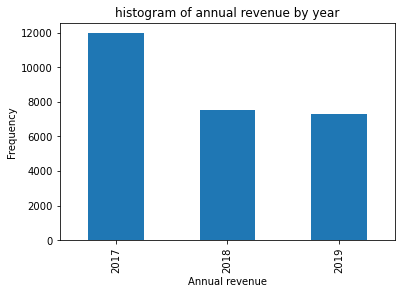

In [137]:
avg_Revenue_by_year.plot(kind="bar")
plt.title("histogram of annual revenue by year")
plt.xlabel("Annual revenue")
plt.ylabel("Frequency")
plt.show()

#### 2)we can group the accounts by their primary producer and analyze which producer brings in the most revenue or which producer has the most accounts

In [138]:
producer_with_most_revenue=df.groupby("Primary Producer")["Annual Revenue"].sum()
producer_with_most_revenue

Primary Producer
Producer1     20000.000000
Producer2    127000.000000
Producer3    229340.000000
Producer4     67277.080000
Producer5    288986.643261
Name: Annual Revenue, dtype: float64

In [139]:
producer_with_most_accounts=df.groupby("Primary Producer")["Account Name"].count()
producer_with_most_accounts

Primary Producer
Producer1     1
Producer2    12
Producer3    41
Producer4    15
Producer5    25
Name: Account Name, dtype: int64

#### Producer 3 has most no. of counts of Acoounts

#### Producer 5 brings the most revenue

In [140]:
df["time_to_take_decision"]=df["Expected Decision_Year"]-df["Year"]

In [141]:
decision_time=df.groupby("Primary Producer").apply(lambda x:(x["time_to_take_decision"]).mean())
decision_time

Primary Producer
Producer1    1.000000
Producer2    0.750000
Producer3    0.317073
Producer4    0.133333
Producer5    0.520000
dtype: float64

### checking normal distribution

In [142]:
from scipy.stats import shapiro

In [143]:
col1=df["Annual Revenue"]
stat,p=shapiro(col1)
alpha=0.05
if p>alpha:
    print("col1 follows normal dist( fail to reject H0)") ## H0=The data is normally distributed
else:
    print("col1 does not follow normal dist( reject H0)")

col1 does not follow normal dist( reject H0)


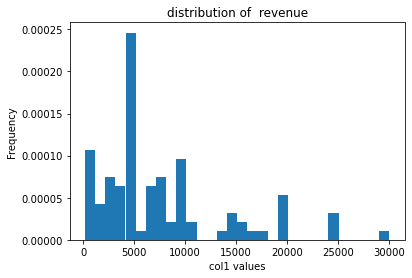

In [144]:
##using histogram
plt.hist(col1,bins=30,density=True)
plt.xlabel("col1 values")
plt.ylabel("Frequency")
plt.title("distribution of  revenue")
plt.show()

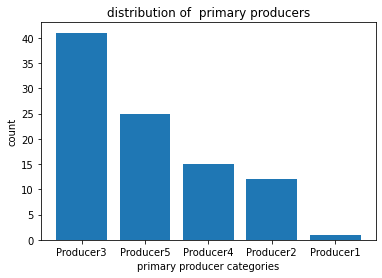

In [145]:
col2=df["Primary Producer"].value_counts()
plt.bar(col2.index,col2.values)
plt.xlabel("primary producer categories")
plt.ylabel("count")
plt.title("distribution of  primary producers")
plt.show()

In [146]:
import pandas as pd
from scipy.stats import f_oneway

# Load the dataset
data = df # Replace "your_dataset.csv" with your actual dataset file

# Perform ANOVA test
groups = []
for producer, group in data.groupby("Primary Producer"):
    groups.append(group["Annual Revenue"])

# Perform ANOVA test
statistic, p_value = f_oneway(*groups)

# Print the results
print("ANOVA Results:")
print("-------------")
print("F-Statistic:", statistic)
print("p-value:", p_value)

# Draw conclusions
if p_value < 0.05:
    print("There is a significant difference in the mean annual revenue across different primary producers.")
    
    # Calculate mean revenue for each producer group
    mean_revenues = {}
    for producer, group in data.groupby("Primary Producer"):
        mean_revenues[producer] = group["Annual Revenue"].mean()

    # Find the most profitable producer
    most_profitable_producer = max(mean_revenues, key=mean_revenues.get)
    print("The most profitable producer is:", most_profitable_producer)
else:
    print("There is no significant difference in the mean annual revenue across different primary producers.")

ANOVA Results:
-------------
F-Statistic: 7.522344049207908
p-value: 2.880117691969804e-05
There is a significant difference in the mean annual revenue across different primary producers.
The most profitable producer is: Producer1


In [149]:
grouped_data = df.groupby("Account Name")["Annual Revenue"].sum().reset_index()

# Sort the data by total revenue in descending order
sorted_data = grouped_data.sort_values(by="Annual Revenue", ascending=False)

# Get the top 5 account names
top_5_accounts = sorted_data.head(5)["Account Name"].tolist()

# Print the top 5 account names
print("Top 5 account names by revenue:")
for account in top_5_accounts:
    print(account)

Top 5 account names by revenue:
Vacuum Furnace Engineering Ltd
police mutual
Transmanor Limited
ADI Shuttle Group, LLC
Arh Group Ltd


In [157]:

# Filter the data for a specific year
target_year = 2018  # Replace with the desired year
filtered_data = df[df["Year"] == target_year]

# Sort the data by annual revenue in descending order
sorted_data = filtered_data.sort_values(by="Annual Revenue", ascending=False)

# Get the top 5 account names
top_5_accounts = sorted_data.head(5)["Account Name"].tolist()

# Print the top 5 account names
print("Top 5 account names with the highest annual revenue in", target_year)
for account in top_5_accounts:
    print(account)


Top 5 account names with the highest annual revenue in 2018
Vanguard Foundry Ltd
West Point Construction Ltd
Hickstead Estates
Purity Brewing Co Limited
IBP Conex Ltd
